In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
sys.path.append("..")
from src import preprocessing
%matplotlib inline

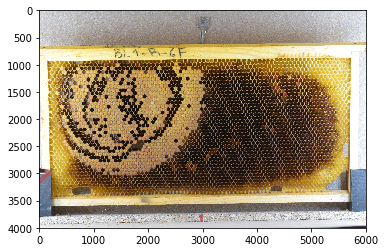

In [15]:
image = cv2.imread("../data/raw/DS_COMB_PT/BEE_HOPE GIMONDE 2016_04_30 BL1_G DSC_1964.JPG")

def convert_bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(convert_bgr_to_rgb(image))
plt.show()

In [13]:
# preprocess the image
image_preproc = preprocessing.pipeline(image)

In [26]:
# stores all detected cells
all_cells = np.array([])
hist_data = []

# find cells with different 
for j in range(5,50, 5):
    cells = cv2.HoughCircles(image_preproc, cv2.HOUGH_GRADIENT, dp=2, 
                             minDist=12, param1=145, param2=55, 
                             minRadius=j+1, maxRadius=j+5)

    if cells is not None:
        cells = cells[0][:,:3].astype(np.int32)
        all_cells = np.vstack((all_cells, cells)) if all_cells.size else cells 

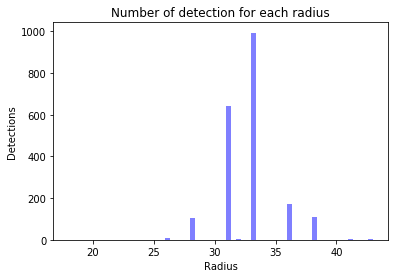

In [29]:
# plot the frequency of detection for each radius
x = all_cells[:,-1]
num_bins = 60
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Radius')
plt.ylabel('Detections')
plt.title("Number of detection for each radius")
plt.show()

In [32]:
# select average radius
if all_cells.size == 0:
    average_radius = 33 
else:
    # count number of occurrences of each value in array
    average_radius = np.bincount(all_cells[:,-1]).argmax()
print(f"Average radius: {average_radius}px")

Average radius: 33px


In [35]:
# minimum distance between two detections
minDist = average_radius * 2 - ((average_radius * 9/26) + 75/26)
print(f"Minimum distance: {minDist}px")

Minimum distance: 51.69230769230769px


In [43]:
# minRadius and maxRadius
minRadius = average_radius - max(2, math.floor(average_radius * .1))
maxRadius = average_radius + max(2,math.floor(average_radius * .1))

print(f"minRadius: {minRadius}px\nmaxRadius: {maxRadius}px")


minRadius: 30px
maxRadius: 36px


In [45]:
# detect de cells again using less restritive parameters
cells = cv2.HoughCircles(image_preproc, cv2.HOUGH_GRADIENT, dp=3, 
                         minDist=minDist,  param1=100, param2=25, 
                         minRadius=minRadius, maxRadius=maxRadius)

if cells is not None:
    cells = cells[0][:,:3].astype(np.int32)

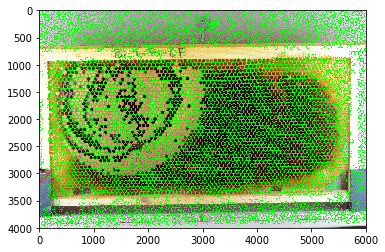

In [48]:
# draw the cells
def draw_cells(image, cells):
    for c in cells:
        image = cv2.circle(image, (c[0], c[1]), (c[2]), (0, 255, 0), 6)
    return image

img = draw_cells(np.copy(image), cells)


def convert_bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(convert_bgr_to_rgb(img))
plt.show()